In [1]:
!pip install pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#
1)chest pain type (4 values)
Value 0: typical angina
Value 1: atypical angina
Value 2: non-anginal pain
Value 3: asymptomatic

2)trestbps: resting blood pressure (in mm Hg on admission to the hospital)

3)chol: serum cholestoral in mg/dl

4)fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

5)restecg: resting electrocardiographic results
■Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
■ Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

6)thalach: maximum heart rate achieved

7)exang: exercise induced angina (1 = yes; 0 = no)

8)oldpeak ST depression induced by exercise relative to rest

9)Slope: the slope of the peak exercise ST segment

■Value 1: upsloping
■Value 2: flat
■Value 3: downsloping

10)ca: number of major vessels (0-3) colored by flourosopy

11)thal: 3 normal; 6 = fixed defect; 7 = reversable defect

12)target: 0=less chance of heart attack, 1=more chance of heart attack

In [3]:
heart_dataset=pd.read_csv("heart.csv")
heart_dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
heart_dataset.shape

(1025, 14)

In [6]:
print("Number of rows:",heart_dataset.shape[0])
print("Number of columns:",heart_dataset.shape[1])

Number of rows: 1025
Number of columns: 14


In [7]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
heart_dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
heart_dataset.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

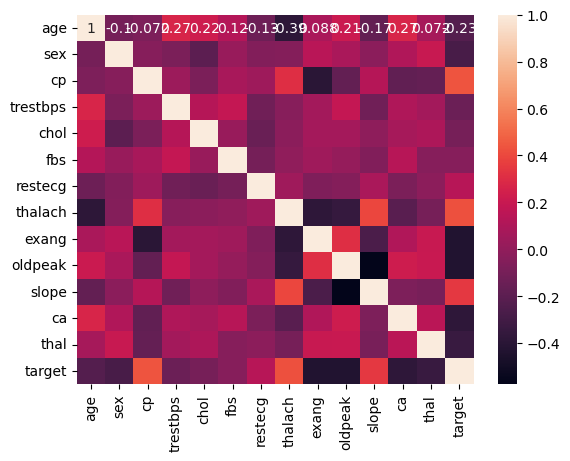

In [12]:
sns.heatmap(heart_dataset.corr(),annot=True)

In [15]:
#Total columns
heart_dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [16]:
heart_dataset['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

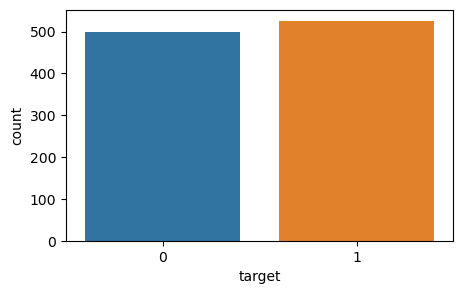

In [19]:
plt.figure(figsize=(5,3))
sns.countplot(x='target',data=heart_dataset)
plt.show()

In [20]:
# Count of male and female
heart_dataset['sex'].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

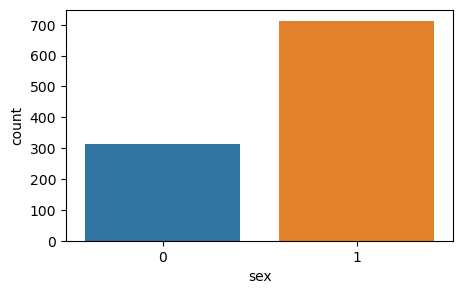

In [21]:
plt.figure(figsize=(5,3))
sns.countplot(x='sex',data=heart_dataset)
plt.show()

([<matplotlib.axis.XTick at 0x25c4c9d6950>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

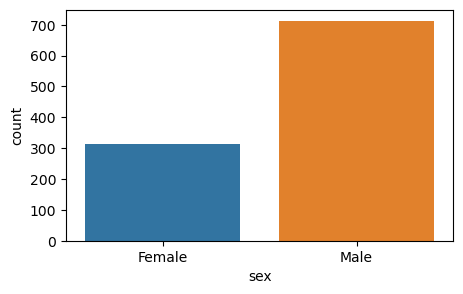

In [22]:
plt.figure(figsize=(5,3))
sns.countplot(x='sex',data=heart_dataset)
plt.xticks([0,1],['Female','Male'])

C:\Users\swapnil\AppData\Local\Temp\ipykernel_13388\1796919195.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_dataset['age'],bins=20)
C:\Users\swapnil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


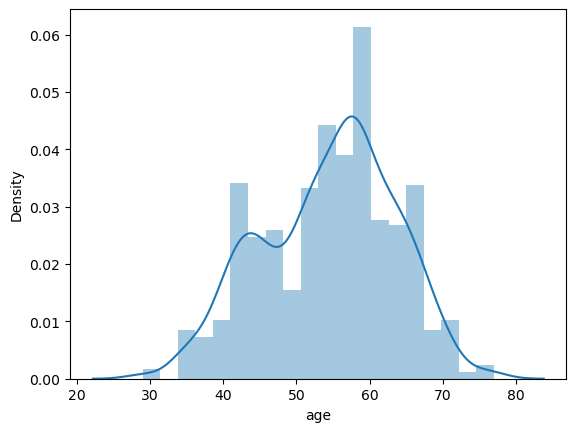

In [25]:
#check Age in the dataset
sns.distplot(heart_dataset['age'],bins=20)
plt.show()

check chest pain
 value 0: typical angina
 value 1: atypical angina
 value 2: nonangina pain
 value 4: asymptomatic

([<matplotlib.axis.XTick at 0x25c51552150>,
 [Text(0, 0, 'typical angina value'),
  Text(1, 0, 'atypical angina value'),
  Text(2, 0, 'nonangina pain value'),
  Text(3, 0, ' asymptomatic')])

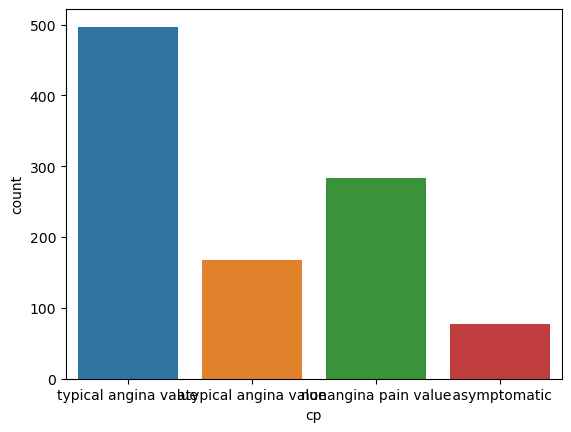

In [27]:
sns.countplot(x='cp', data=heart_dataset)
plt.xticks([0,1,2,3],["typical angina value", "atypical angina value", "nonangina pain value"," asymptomatic"])

<Axes: >

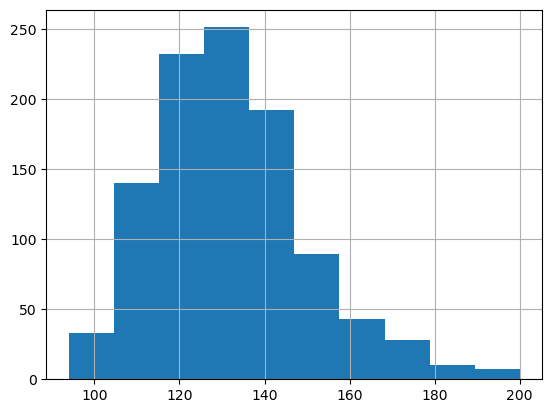

In [29]:
#checking blood pressure
heart_dataset['trestbps'].hist()

C:\Users\swapnil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\swapnil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swapnil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\swapnil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

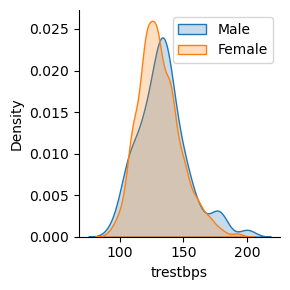

In [32]:
#blood pressure vs sex
g=sns.FacetGrid(heart_dataset,hue="sex")
g.map(sns.kdeplot,'trestbps',shade=True)
plt.legend(labels=['Male','Female'])

<Axes: >

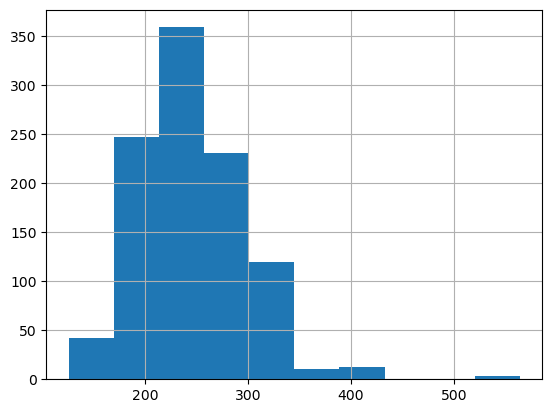

In [33]:
# serum cholesterol
heart_dataset['chol'].hist()

In [34]:
# Plot continuous variables
cate_val=[]
cont_val=[]

for column in heart_dataset.columns:
    if heart_dataset[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [35]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [36]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

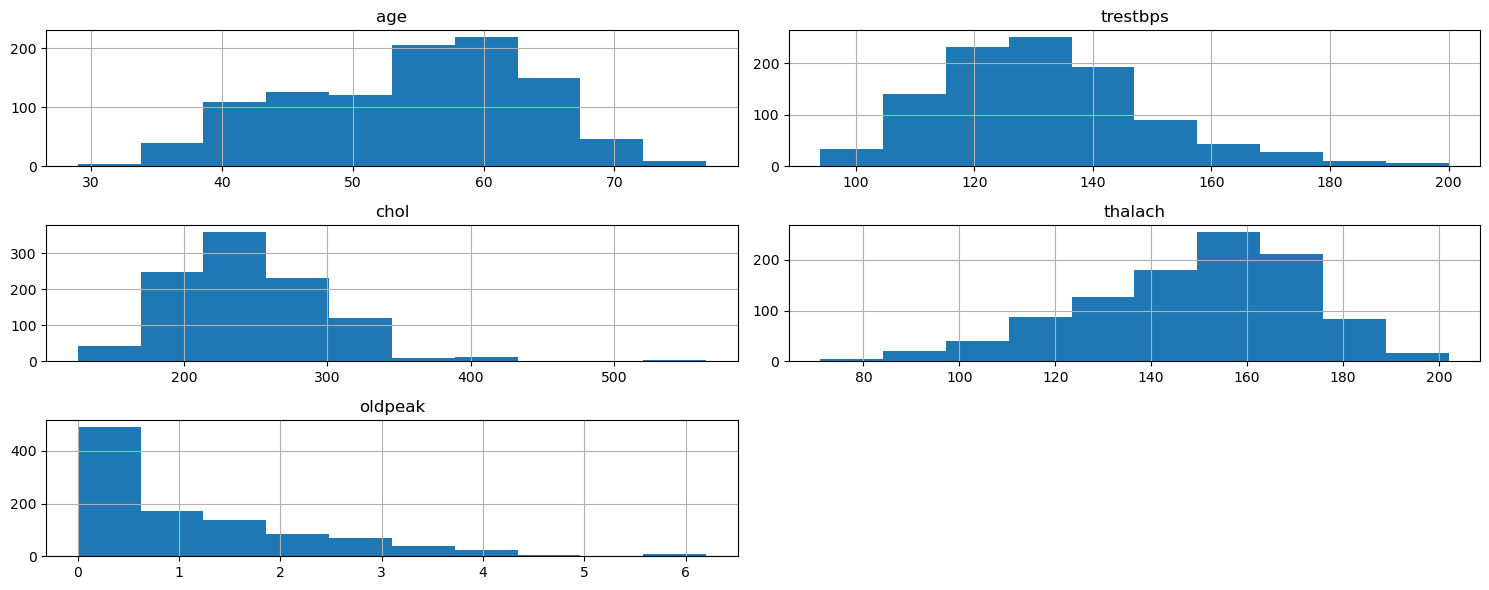

In [38]:
heart_dataset.hist(cont_val, figsize=(15,6))
plt.tight_layout()
plt.show()